# Pymaceuticals Inc.
---

### Analysis

- Based on the below regimen analysis, it appears that Capomulin and Ramicane have the more significant impact compared to other drug regimens, including placebo, which suggests that these two treatments might be more effective in reducing tumor volume and controlling metastasis, as significant metastisis reduction over the span of the timepoints is also found in the same two regimens. Further inquiry will need to be made to assess more-long term affects of the two regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
print(mice_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = cleaned_df["Mouse ID"].nunique()
print(mice_count)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_data = cleaned_df.set_index(["Drug Regimen"])
group_drug_data = regimen_data.groupby("Drug Regimen")
drug_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_stdev = group_drug_data["Tumor Volume (mm3)"].std()
drug_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df  = pd.DataFrame({"Mean Tumor Volume":  drug_mean,
                                 "Median Tumor Volume":  drug_median,
                                 "Tumor Volume Variance":  drug_var,
                                 "Tumor Volume Std. Dev.":  drug_stdev,
                                 "Tumor Volume Std. Err.":  drug_sem})
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, 'sem'])
summary_stats

/var/folders/8k/j55dq0kx0kdgb_4qjjs1fcrr0000gn/T/ipykernel_2341/2381111759.py:5: FutureWarning: The provided callable <function mean at 0x104309bc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, 'sem'])
/var/folders/8k/j55dq0kx0kdgb_4qjjs1fcrr0000gn/T/ipykernel_2341/2381111759.py:5: FutureWarning: The provided callable <function median at 0x10444fec0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, 'sem'])
/var/folders/8k/j55dq0kx0kdgb_4qjjs1fcrr0000gn/T/ipykernel_2341/2381111759.py:5: FutureWarning: The prov

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

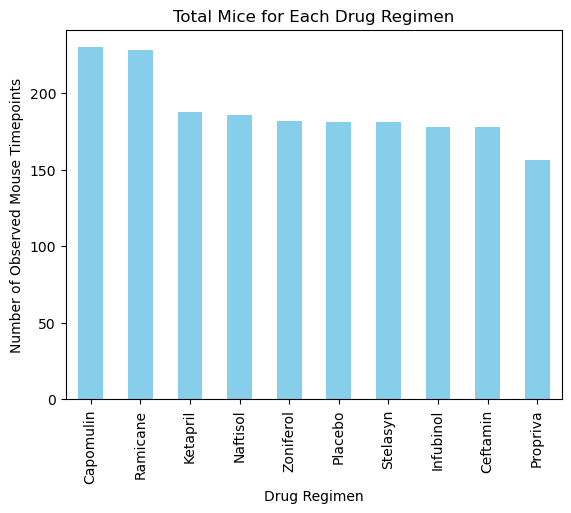

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Total Mice for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.show()

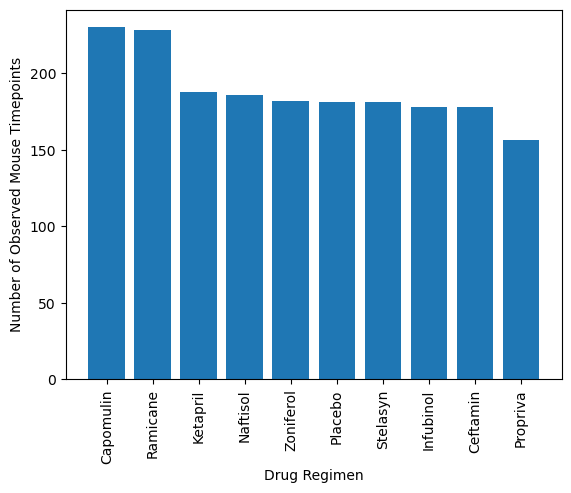

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = cleaned_df['Drug Regimen'].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

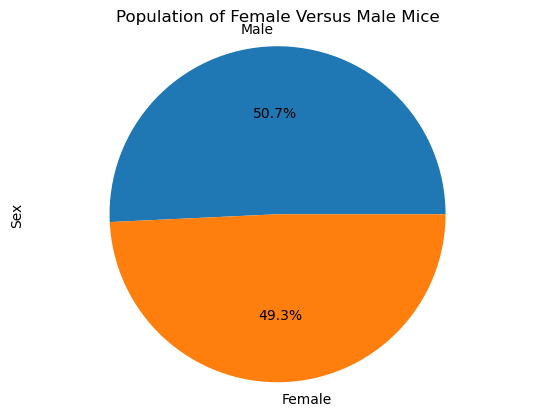

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = cleaned_df["Sex"].value_counts()
gender_pie.plot(kind="pie", title="Population of Female Versus Male Mice", autopct='%1.1f%%', ylabel = "Sex")
plt.axis('equal')
plt.show()

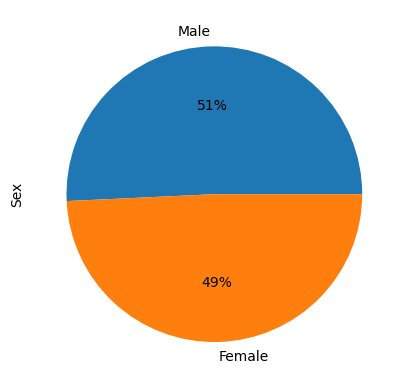

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = gender_pie.index.values
count_value = gender_pie.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoints = pd.DataFrame(max_timepoint).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, merged_df, on=['Mouse ID', 'Timepoint'], how='left')
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_data[merged_data['Drug Regimen'].isin(treatments)]
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol_subset)
    
    # Determine outliers using upper and lower bounds
quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
lower_bound = lower_q - 1.5 * iqr
upper_bound = upper_q + 1.5 * iqr

potential_outliers = tumor_vol_subset[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
print(f"Potential outliers for {treatment}: {potential_outliers}")

Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

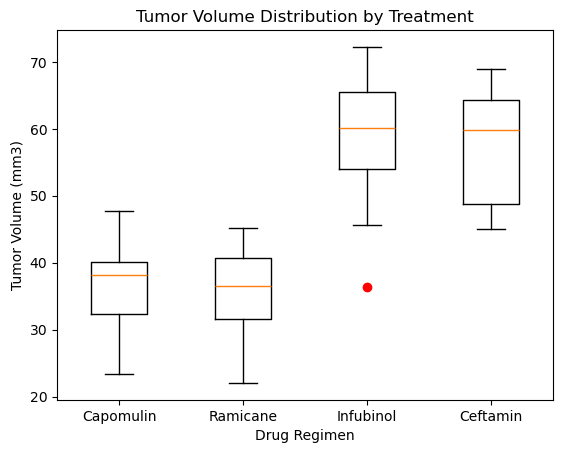

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments, sym='r')  # 'sym' adds red outliers
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

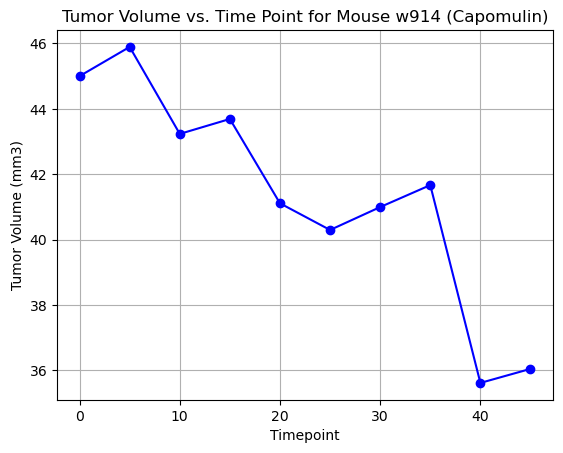

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'w914'

# Filter for mouse and Capomulin treatment
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Step 3: Generate a line plot
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

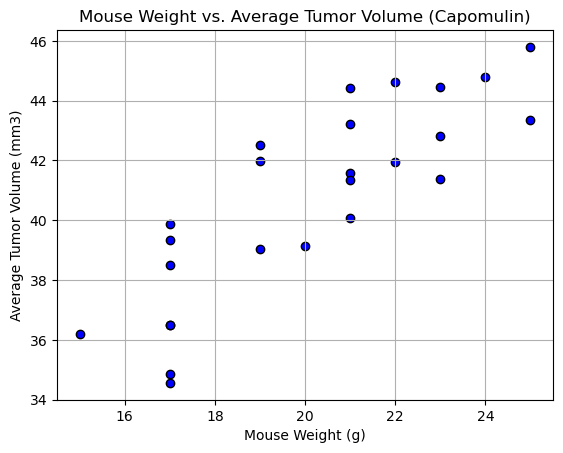

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Set data frames for tumor volume and mouse weight
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

## Correlation and Regression

Correlation Coefficient: 0.84


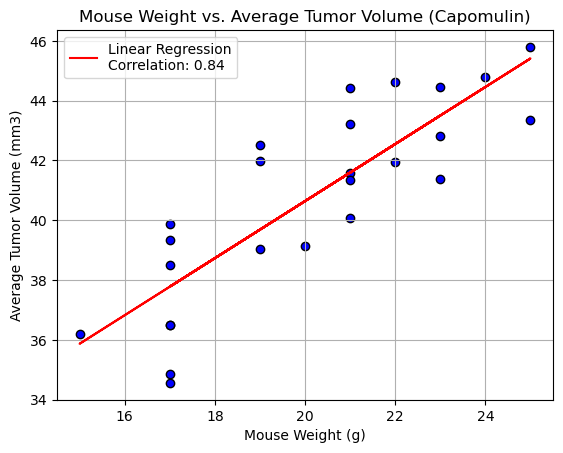

In [18]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = round(mouse_weight.corr(avg_tumor_volume), 2)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.plot(mouse_weight, regress_values, 'r-', label=f'Linear Regression\nCorrelation: {correlation_coefficient}')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

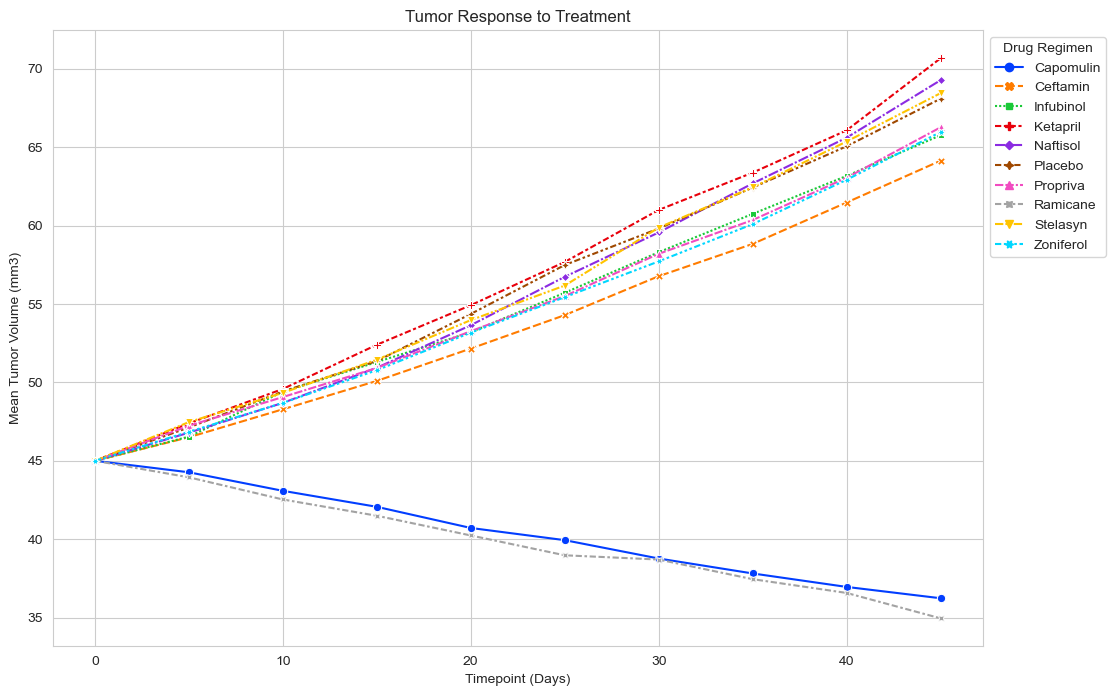

In [19]:
# Tumor Response to Treatment

tumor_response_data = cleaned_df.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

#Pivot data
tumor_response_pivot = tumor_response_data.pivot(index='Timepoint', columns='Drug Regimen', values='Tumor Volume (mm3)')

#Plot line chart
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.lineplot(data=tumor_response_pivot, markers=True, palette='bright')
plt.title('Tumor Response to Treatment')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.legend(title='Drug Regimen', bbox_to_anchor=(1, 1))

/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryannuttall/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

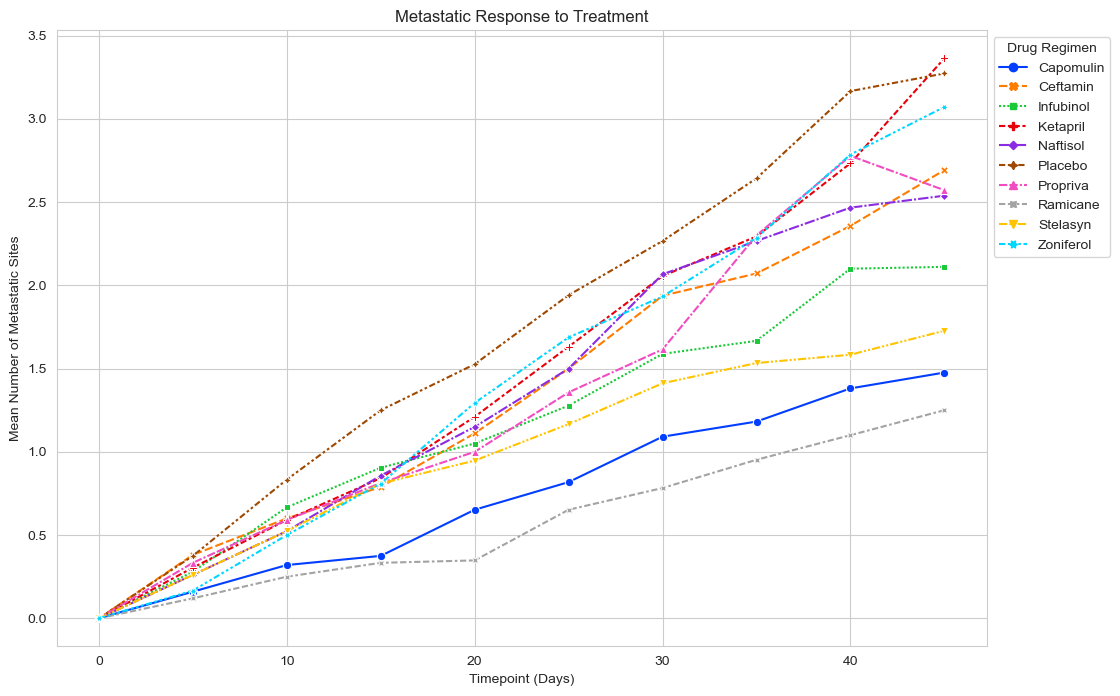

In [20]:
#Metastic response to treatments
metastatic_response_data = cleaned_df.groupby(['Drug Regimen', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

#Pivot data
metastatic_response_pivot = metastatic_response_data.pivot(index='Timepoint', columns='Drug Regimen', values='Metastatic Sites')

#Plot line chart
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.lineplot(data=metastatic_response_pivot, markers=True, palette='bright')
plt.title('Metastatic Response to Treatment')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Mean Number of Metastatic Sites')
plt.legend(title='Drug Regimen', bbox_to_anchor=(1, 1))
plt.show()